<a href="https://colab.research.google.com/github/andylynchul/ET5003_Assignments/blob/master/Week%205/2028189_ET5003_KaggleCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [837]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [838]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [839]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [840]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [841]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [842]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [843]:
!pip install gpy

In [844]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [845]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [846]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [847]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Path, copy the path from your Drive
Path = '/content/drive/MyDrive/Masters/Year2/ET5003/Week5/Data/'

# House Data
train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'
cost_data = Path + 'sample_submission.csv'

# train data
df_train = pd.read_csv(train_data)

# test data
df_test = pd.read_csv(test_data)

# test data
#df_cost = pd.read_csv(cost_data)

# test data
#df_test = df_test.join(df_cost.drop("Id", axis=1))


print(df_train.shape)
print(df_test.shape)
#print(df_cost.shape)

Mounted at /content/drive
(1638, 14)
(702, 13)


In [848]:
df_train.tail()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
1633,1634,12424903,Blackrock,1,2,C2,Built in c.1930 38 Stradbrook Road is a deligh...,"Parking,Gas Fired Central Heating,Alarm,Wheelc...",Extremely convenient location \nWheelchair acc...,53.292767,-6.166668,bungalow,64.00,500000
1634,1635,12383142,Blackrock,3,5,C1,An impressive three-story family home superbly...,NaN,Gas fired central heating with underfloor heat...,53.284975,-6.178685,detached,175.96,795000
1635,1636,12426975,Lucan,2,3,A3,DNG Lucan's leading estate agents are delighte...,NaN,None,53.351667,-6.435278,semi-detached,98.00,340000
1636,1637,12198921,Sandymount,8,8,D2,Holyrood Castle is a most distinctive 19th cen...,NaN,None,53.328997,-6.221030,detached,507.00,2500000
1637,1638,12314237,Shankill,2,2,E1,A superb opportunity awaits to acquire this be...,NaN,Turn key condition\nWood burning stove\nSlider...,53.231438,-6.125022,semi-detached,50.00,370000


In [849]:
df_test.tail()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
697,2336,12392566,Kilmainham,1,1,G,Sherry FitzGerald is delighted to present 56 B...,NaN,Secure gated and well maintained development\n...,53.343377,-6.296654,apartment,40.0
698,2337,12352487,Stoneybatter,1,2,D2,26 Viking Road is a well presented and moderni...,NaN,Well presented and modernised extended two bed...,53.351074,-6.285557,terraced,57.0
699,2338,12387290,Cabinteely,1,3,D1,FIRST OPEN VIEW SATURDAY 8TH FEBRUARY 11 - 11....,"Parking,Gas Fired Central Heating",None,53.261710,-6.164979,semi-detached,93.0
700,2339,12382807,Clontarf,2,3,NaN,DNG are delighted to represent the sale of 109...,NaN,Gas fired central heating.\nFully renovated an...,53.360515,-6.189661,terraced,118.0
701,2340,12393769,Glenageary,1,3,F,This is an instantly appealing Jennings built ...,NaN,Drenched in natural light\nSuperb blank canvas...,53.280408,-6.132925,semi-detached,122.0


In [850]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1638 non-null   int64  
 1   ID             1638 non-null   int64  
 2   Location       1638 non-null   object 
 3   Num_Bathrooms  1638 non-null   int64  
 4   Num_Beds       1638 non-null   int64  
 5   BER_class      1387 non-null   object 
 6   Description    1638 non-null   object 
 7   Services       577 non-null    object 
 8   Features       1638 non-null   object 
 9   Latitude       1638 non-null   float64
 10  Longitude      1638 non-null   float64
 11  Type           1638 non-null   object 
 12  Surface        1638 non-null   float64
 13  Price          1638 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 179.3+ KB


In [851]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,1638.0,8.195000e+02,472.994186,1.000000e+00,4.102500e+02,8.195000e+02,1.228750e+03,1.638000e+03
ID,1638.0,1.231930e+07,144754.041968,1.118567e+07,1.228104e+07,1.238055e+07,1.240548e+07,1.242836e+07
Num_Bathrooms,1638.0,2.054335e+00,1.241259,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
Num_Beds,1638.0,3.043346e+00,1.379650,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.700000e+01
Latitude,1638.0,5.335047e+01,0.076832,5.250186e+01,5.329426e+01,5.334139e+01,5.338203e+01,5.363059e+01
Longitude,1638.0,-6.255086e+00,0.144430,-6.497000e+00,-6.309613e+00,-6.247780e+00,-6.193982e+00,-1.744995e+00
Surface,1638.0,1.695407e+02,1791.793934,3.400000e+00,7.300000e+01,9.705000e+01,1.350000e+02,7.223639e+04
Price,1638.0,5.547196e+05,565203.162814,1.999500e+04,2.950000e+05,3.950000e+05,5.950000e+05,8.900000e+06


In [852]:
# Use this to get some high level information about the missing data
df_train.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [853]:
# Find the number of nulls/NaNs in the dataset as a percentage to see if any columns need to be considered for removal
print("Read of missing values as percentage of data set")
df_train.isna().sum()*100/len(df_train)

Read of missing values as percentage of data set


Index             0.000000
ID                0.000000
Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64

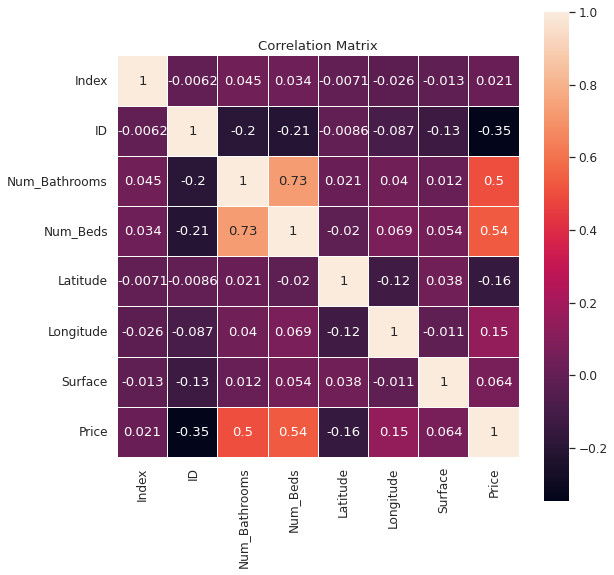

In [854]:
# calculate the correlation matrix
corr = df_train.corr()

# plot the heatmap
sns.set(font_scale=1.10)
plt.figure(figsize=(9, 9))
plt.title('Correlation Matrix')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=0.01,square=True,annot=True)

Pairplots of numerical features


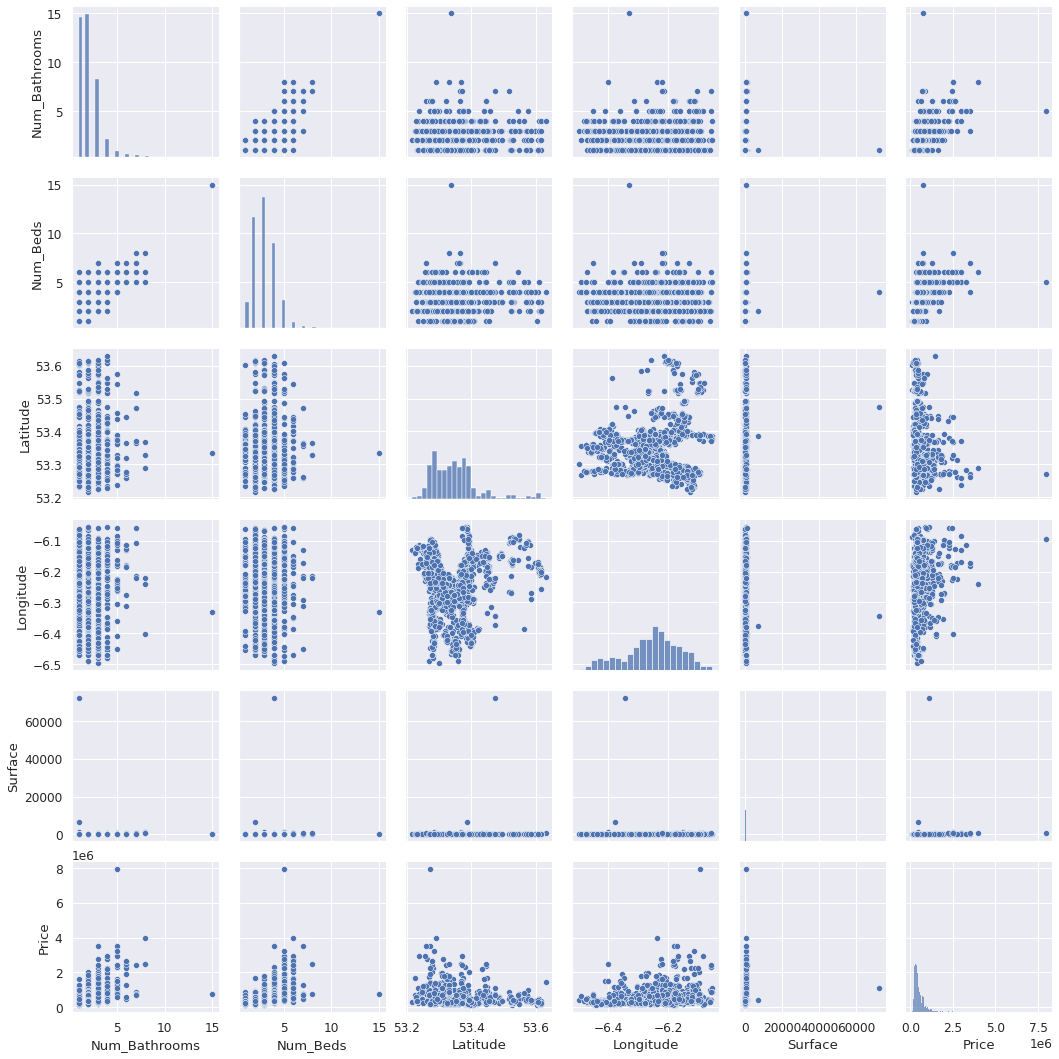

In [855]:
# Pairplot to see the relationship between numerical features. The method dropna() drops all rows with missing values 
# No of units and facility are removed due to high number of NULL values
print('Pairplots of numerical features')
sns.pairplot(data=df_train[['Num_Bathrooms','BER_class','Num_Beds','Latitude','Longitude','Surface','Price']].dropna())
plt.show()

In [856]:
# Get a read of Categorical Values
cat_cols = df_train.select_dtypes(include=['object'])     #strip out the categorical cols
cat_cols.columns[cat_cols.any()].tolist()           #convert col names to list
for i in cat_cols:                                  #loop through the cols
    print(cat_cols[i].value_counts(),"\n")          #print the summary to analyse

Castleknock            57
Malahide               50
Lucan                  49
Rathfarnham            46
Clondalkin             41
                       ..
Park West               1
Deansgrange             1
South Circular Road     1
Islandbridge            1
Brittas                 1
Name: Location, Length: 142, dtype: int64 

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64 

** Please note. This property can only be sold to a cash buyer** \n\r\nNo. 41 Oak House is a beautifully presented one bedroom apartment located on the third floor of this exclusive modern development. With

# Data Preparation

In [1026]:
# Global Varoable
drop_features = ['Surface','Index','ID','Services']
include_featues = ['Num_Bathrooms','Num_Beds','BER_class', 'Price']
nlp_features = ['Features','Description']

# Function to Detection Outlier on one-dimentional datasets.
def prepare_data(dframe):
    '''Function to Prepare Data for Model'''
    
    #define encoder
    enc = OneHotEncoder(handle_unknown='ignore')

    # drop low value features
    dframe = dframe.drop(drop_features, axis=1)

    # encode BER
    BERMap = {
      "A1": 1,
      "A2": 2,
      "A3": 3,
      "B1": 4,
      "B2": 5,
      "B3": 6,
      "C1": 7,
      "C2": 8,
      "C3": 9,
      "D1": 10,
      "D2": 11,
      "E1": 12,
      "E2": 13,
      "F": 14,
      "G": 15,
      "SINo666of2006exempt" : 0
    }
    dframe['BER_class'] = dframe['BER_class'].replace(BERMap)

    # impute the mean for BER
    dframe['BER_class'].fillna(round(dframe['BER_class'].mean(),0), inplace=True) # Only 2nd hand properties are missing BER. Therefore, we input the average for 2nd hand ones

    # encode Type
    property_type_mapper = {
      "apartment": 1,
      "bungalow": 5,
      "detached": 9,
      "duplex": 2,
      "end-of-terrace": 6,
      "semi-detached": 8,
      "site": 3,
      "studio": 0,
      "terraced": 4,
      "townhouse": 7
    }
    dframe['Type'] = dframe['Type'].replace(property_type_mapper)

    #one hot encode Location in Dataset
    if 'Location' in dframe:
      dframe = pd.get_dummies(dframe, columns=['Location'],
                              dummy_na=True, 
                              drop_first=True)
    
    #for i in range(0, len(include_featues)): 
      #if (include_featues[i] != 'Price'):
        #dframe = remove_outliers(dframe,include_featues[i])
    
    # Strip out the geo outliers
    # index_train = dframe[(dframe['Longitude'] > -6.0)|(dframe['Latitude'] < 53.0)].index
    # dframe.drop(index_train, inplace=True)

    return dframe

def nlp_data(dframe):
    '''Apply NLP Processing to a DataFrame'''

    for feature in dframe:
      # removing spaces
      if dframe[feature] is str:
        dframe[feature] = dframe[feature].str.replace("[^a-zA-Z#]", " ")
        
        # transforming to lowercase
        dframe[feature] = dframe[feature].apply(lambda x: x.lower())

        # Removing single letters
        dframe[feature] = dframe[feature].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
        
        # removing short words
        short_word = 4
        dframe[feature] = dframe[feature].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

        # Tokenisation
        tokenised_doc = dframe[feature].apply(lambda x: x.split())

        # remove stop-words
        tokenised_doc = tokenised_doc.apply(lambda x: [item for item in x if item not in stop_words])

        # de-tokenization
        detokenized_doc = []
        for i,token in enumerate(tokenised_doc):
          #print(i,token)
          t = ' '.join(token)
          detokenized_doc.append(t)

        # Replace feature with the de-tokenised text
        #print("Idx {} Len of detok {}".format(i, len(detokenized_doc)))
        dframe[feature] = detokenized_doc

    return dframe
  
def vectorise_data(dframe,feature):
    vectorizer = TfidfVectorizer(stop_words='english', max_features= 20, max_df=0.5, smooth_idf=True, ngram_range=(2,5))
    v_array = vectorizer.fit_transform(dframe[feature])
    v_features = [str(x).replace(" ","_") for x in vectorizer.get_feature_names()]
    v_data = pd.DataFrame(data=np.hstack([v_array.toarray()]), columns=v_features)
    dframe = v_data.astype(bool).astype(int)
    
    return dframe


In [1035]:
df_test_prepped = prepare_data(df_test)
df_test_prepped[nlp_features].astype(str)
df_test_nlp = nlp_data(df_test_prepped[nlp_features].astype(object))
df_test_vector = vectorise_data(df_test_nlp,'Features')

df_test_full = pd.concat([df_test_prepped, df_test_vector], axis=1)
df_test_full = df_test_full.drop(nlp_features, axis=1)

df_test_full

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Location_Ashtown,Location_Balbriggan,Location_Baldoyle,Location_Balgriffin,Location_Ballinteer,Location_Ballsbridge,Location_Ballybrack,Location_Ballycullen,Location_Ballyfermot,Location_Ballymun,Location_Balrothery,Location_Beaumont,Location_Blackrock,Location_Blanchardstown,Location_Booterstown,Location_Brittas,Location_Cabinteely,Location_Cabra,Location_Carrickmines,Location_Castleknock,Location_Chapelizod,Location_Cherry Orchard,Location_Christchurch,Location_Churchtown,Location_Citywest,Location_Clarehall,Location_Clondalkin,Location_Clonee,Location_Clongriffin,Location_Clonshaugh,Location_Clonsilla,Location_Clonskeagh,Location_Clontarf,Location_Coolock,...,Location_Santry,Location_Shankill,Location_Skerries,Location_Smithfield,Location_South Circular Road,Location_Stepaside,Location_Stoneybatter,Location_Sutton,Location_Swords,Location_Tallaght,Location_Temple Bar,Location_Templeogue,Location_Terenure,Location_The Coombe,Location_The Ward,Location_Tyrrelstown,Location_Walkinstown,Location_Whitehall,Location_Windy Arbour,Location_nan,central_heating,city_centre,cul_sac,double_glazed,double_glazed_windows,excellent_location,facing_rear,facing_rear_garden,family_home,fired_central,fired_central_heating,gas_fired,gas_fired_central,gas_fired_central_heating,glazed_windows,rear_garden,south_facing,street_parking,walking_distance,west_facing
0,2,2,8.0,53.316269,-6.243391,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,5,12.0,53.390769,-6.281936,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
2,1,2,15.0,53.272486,-6.108675,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
3,4,4,2.0,53.376932,-6.185334,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,2,3,14.0,53.327208,-6.308938,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,1,1,15.0,53.343377,-6.296654,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
698,1,2,11.0,53.351074,-6.285557,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
699,1,3,10.0,53.261710,-6.164979,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
700,2,3,10.0,53.360515,-6.189661,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0


In [857]:
drop_features = ['Surface','Index','ID','Services']
nlp_features = ['Features','Description']

# Strip out the NLP Features
#df_train_nlp = df_train[nlp_features]

#Drop the NLP Features & Low Value Features
df_train_eda = df_train.drop(drop_features, axis=1)

# Get a read of remaining Categorical Values
cat_cols = df_train_eda.select_dtypes(include=['object'])     #strip out the categorical cols
cat_cols.columns[cat_cols.any()].tolist()           #convert col names to list
for i in cat_cols:                                  #loop through the cols
    print(cat_cols[i].value_counts(),"\n")          #print the summary to analyse

Castleknock            57
Malahide               50
Lucan                  49
Rathfarnham            46
Clondalkin             41
                       ..
Park West               1
Deansgrange             1
South Circular Road     1
Islandbridge            1
Brittas                 1
Name: Location, Length: 142, dtype: int64 

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64 

** Please note. This property can only be sold to a cash buyer** \n\r\nNo. 41 Oak House is a beautifully presented one bedroom apartment located on the third floor of this exclusive modern development. With

In [858]:
#Calculate missing values for the numerical features.
print(df_train.select_dtypes(exclude=['object']).isna().sum())

Index            0
ID               0
Num_Bathrooms    0
Num_Beds         0
Latitude         0
Longitude        0
Surface          0
Price            0
dtype: int64


In [859]:
# Convert BER classification into ordinal features
# Map BER categories 
if 'BER_class' in df_train_eda:
  BERMap = {
      "A1": 1,
      "A2": 2,
      "A3": 3,
      "B1": 4,
      "B2": 5,
      "B3": 6,
      "C1": 7,
      "C2": 8,
      "C3": 9,
      "D1": 10,
      "D2": 11,
      "E1": 12,
      "E2": 13,
      "F": 14,
      "G": 15,
      "SINo666of2006exempt" : 0
  }
  df_train_eda['BER_class'] = df_train_eda['BER_class'].replace(BERMap)


In [860]:
# Replace 'N/A' values in ber_classification with mean of the same property category
if 'BER_class' in df_train_eda:
  ber_avg_val = round(df_train_eda['BER_class'].mean(),0) # mean of ber classification rounded to the nearest whole number. 

  df_train_eda['BER_class'].fillna(ber_avg_val, inplace=True) # Only 2nd hand properties are missing BER. Therefore, we input the average for 2nd hand ones

  print("BER classification replacing missing values for 2nd hand properties: ",ber_avg_val)

BER classification replacing missing values for 2nd hand properties:  10.0


In [861]:
#one hot encode all the remaining categorical fields

if 'Type' in df_train_eda:
  # creating instance of one-hot-encoder
  enc = OneHotEncoder(handle_unknown='ignore')

  #enc_df_train = pd.DataFrame(enc.fit_transform(df_train_p[['property_type']]).toarray())
  #df_train_p = df_train_p.join(enc_df_train)

  #enc_df_test  = pd.DataFrame(enc.fit_transform(df_test_p[['property_type']]).toarray())
  #df_test_p = df_test_p.join(enc_df_test)

  # now one-hot encode all categorical columns with nan
  #df_train_eda = pd.get_dummies(df_train_eda, columns=['Type'], 
                          #dummy_na=True, 
                          #drop_first=True)

  # now one-hot encode all categorical columns with nan
  #df_test_p = pd.get_dummies(df_test_p, columns=['property_type'], 
                          #dummy_na=True, 
                          #drop_first=True)

print(df_train_eda.tail())

        Location  Num_Bathrooms  Num_Beds  ...  Longitude           Type    Price
1633   Blackrock              1         2  ...  -6.166668       bungalow   500000
1634   Blackrock              3         5  ...  -6.178685       detached   795000
1635       Lucan              2         3  ...  -6.435278  semi-detached   340000
1636  Sandymount              8         8  ...  -6.221030       detached  2500000
1637    Shankill              2         2  ...  -6.125022  semi-detached   370000

[5 rows x 10 columns]


In [862]:
#testing Ordinal Encoding

property_type_mapper = {
    "apartment": 1,
    "bungalow": 5,
    "detached": 9,
    "duplex": 2,
    "end-of-terrace": 6,
    "semi-detached": 8,
    "site": 3,
    "studio": 0,
    "terraced": 4,
    "townhouse": 7
}

df_train_eda['Type'] = df_train_eda['Type'].replace(property_type_mapper)

print(df_train_eda.tail())

        Location  Num_Bathrooms  Num_Beds  ...  Longitude Type    Price
1633   Blackrock              1         2  ...  -6.166668    5   500000
1634   Blackrock              3         5  ...  -6.178685    9   795000
1635       Lucan              2         3  ...  -6.435278    8   340000
1636  Sandymount              8         8  ...  -6.221030    9  2500000
1637    Shankill              2         2  ...  -6.125022    8   370000

[5 rows x 10 columns]


In [863]:
df_train_eda.drop(['Location'], axis=1)

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Price
0,2,2,9.0,DNG are delighted to present to the market no....,None,53.396659,-6.438791,1,195000
1,1,2,10.0,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,4,425000
2,3,3,3.0,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,8,535000
3,1,3,12.0,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,9,499000
4,3,4,10.0,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,9,510000
...,...,...,...,...,...,...,...,...,...
1633,1,2,8.0,Built in c.1930 38 Stradbrook Road is a deligh...,Extremely convenient location \nWheelchair acc...,53.292767,-6.166668,5,500000
1634,3,5,7.0,An impressive three-story family home superbly...,Gas fired central heating with underfloor heat...,53.284975,-6.178685,9,795000
1635,2,3,3.0,DNG Lucan's leading estate agents are delighte...,None,53.351667,-6.435278,8,340000
1636,8,8,11.0,Holyrood Castle is a most distinctive 19th cen...,None,53.328997,-6.221030,9,2500000


In [864]:
#one hot encode all the remaining categorical fields

if 'Location' in df_train_eda:
  # creating instance of one-hot-encoder
  enc = OneHotEncoder(handle_unknown='ignore')

  #enc_df_train = pd.DataFrame(enc.fit_transform(df_train_p[['property_type']]).toarray())
  #df_train_p = df_train_p.join(enc_df_train)

  #enc_df_test  = pd.DataFrame(enc.fit_transform(df_test_p[['property_type']]).toarray())
  #df_test_p = df_test_p.join(enc_df_test)

  # now one-hot encode all categorical columns with nan
  df_train_eda = pd.get_dummies(df_train_eda, columns=['Location'], 
                          dummy_na=True, 
                          drop_first=True)

  # now one-hot encode all categorical columns with nan
  #df_test_p = pd.get_dummies(df_test_p, columns=['property_type'], 
                          #dummy_na=True, 
                          #drop_first=True)

print(df_train_eda.tail())

      Num_Bathrooms  Num_Beds  ...  Location_Windy Arbour Location_nan
1633              1         2  ...                      0            0
1634              3         5  ...                      0            0
1635              2         3  ...                      0            0
1636              8         8  ...                      0            0
1637              2         2  ...                      0            0

[5 rows x 151 columns]


In [865]:
# First filter out those rows that
# do not contain any data

print(df_train_eda.select_dtypes(exclude=['object']).isna().sum())

Num_Bathrooms            0
Num_Beds                 0
BER_class                0
Latitude                 0
Longitude                0
                        ..
Location_Tyrrelstown     0
Location_Walkinstown     0
Location_Whitehall       0
Location_Windy Arbour    0
Location_nan             0
Length: 149, dtype: int64


In [866]:
df_train_eda.tail()

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Price,Location_Ard Na Greine,Location_Artane,Location_Ashtown,Location_Balbriggan,Location_Baldoyle,Location_Balgriffin,Location_Ballinteer,Location_Ballsbridge,Location_Ballybough,Location_Ballyboughal,Location_Ballybrack,Location_Ballycullen,Location_Ballyfermot,Location_Ballymun,Location_Balrothery,Location_Beaumont,Location_Blackrock,Location_Blanchardstown,Location_Bluebell,Location_Booterstown,Location_Brittas,Location_Cabinteely,Location_Cabra,Location_Carrickmines,Location_Castleknock,Location_Chapelizod,Location_Christchurch,Location_Churchtown,Location_Citywest,Location_Clarehall,Location_Clondalkin,...,Location_Park West,Location_Perrystown,Location_Phibsborough,Location_Portmarnock,Location_Portobello,Location_Raheny,Location_Ranelagh,Location_Rathcoole,Location_Rathfarnham,Location_Rathgar,Location_Rathmichael,Location_Rathmines,Location_Rialto,Location_Ringsend,Location_Rush,Location_Saggart,Location_Sallynoggin,Location_Sandycove,Location_Sandyford,Location_Sandymount,Location_Santry,Location_Shankill,Location_Skerries,Location_Smithfield,Location_South Circular Road,Location_Stepaside,Location_Stoneybatter,Location_Sutton,Location_Swords,Location_Tallaght,Location_Temple Bar,Location_Templeogue,Location_Terenure,Location_The Coombe,Location_The Ward,Location_Tyrrelstown,Location_Walkinstown,Location_Whitehall,Location_Windy Arbour,Location_nan
1633,1,2,8.0,Built in c.1930 38 Stradbrook Road is a deligh...,Extremely convenient location \nWheelchair acc...,53.292767,-6.166668,5,500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1634,3,5,7.0,An impressive three-story family home superbly...,Gas fired central heating with underfloor heat...,53.284975,-6.178685,9,795000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1635,2,3,3.0,DNG Lucan's leading estate agents are delighte...,None,53.351667,-6.435278,8,340000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1636,8,8,11.0,Holyrood Castle is a most distinctive 19th cen...,None,53.328997,-6.221030,9,2500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1637,2,2,12.0,A superb opportunity awaits to acquire this be...,Turn key condition\nWood burning stove\nSlider...,53.231438,-6.125022,8,370000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Detection / Removal of Outliers

In [867]:
# Function to Detection Outlier on one-dimentional datasets.
def remove_outliers(dframe, feature):
    '''Function to Detect / Remove Outliers'''
  
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(dframe[feature])
    random_data_mean = np.mean(dframe[feature])
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    dframe = dframe.drop(dframe[(dframe[feature] < lower_limit) | (dframe[feature] > upper_limit)].index)

    return dframe

def plot_box_hist(dframe, features):
    '''Function to plot Box / Histogram pair for any feature'''
    no_feats = len(features)
  
    figH = plt.figure(figsize=(30,no_feats*5))

    for i in range(0, no_feats): 
        ax1 = figH.add_subplot(no_feats, 2, (i*2)+1)
        ax1.set_title("Boxplot of "+features[i])
        dframe.boxplot(column=[features[i]])

        ax2 = figH.add_subplot(no_feats, 2, (i*2)+2)
        ax2.set_title("Histogram of "+features[i])
        dframe[features[i]].hist(bins=20)

    plt.show()

Analysis of outliers


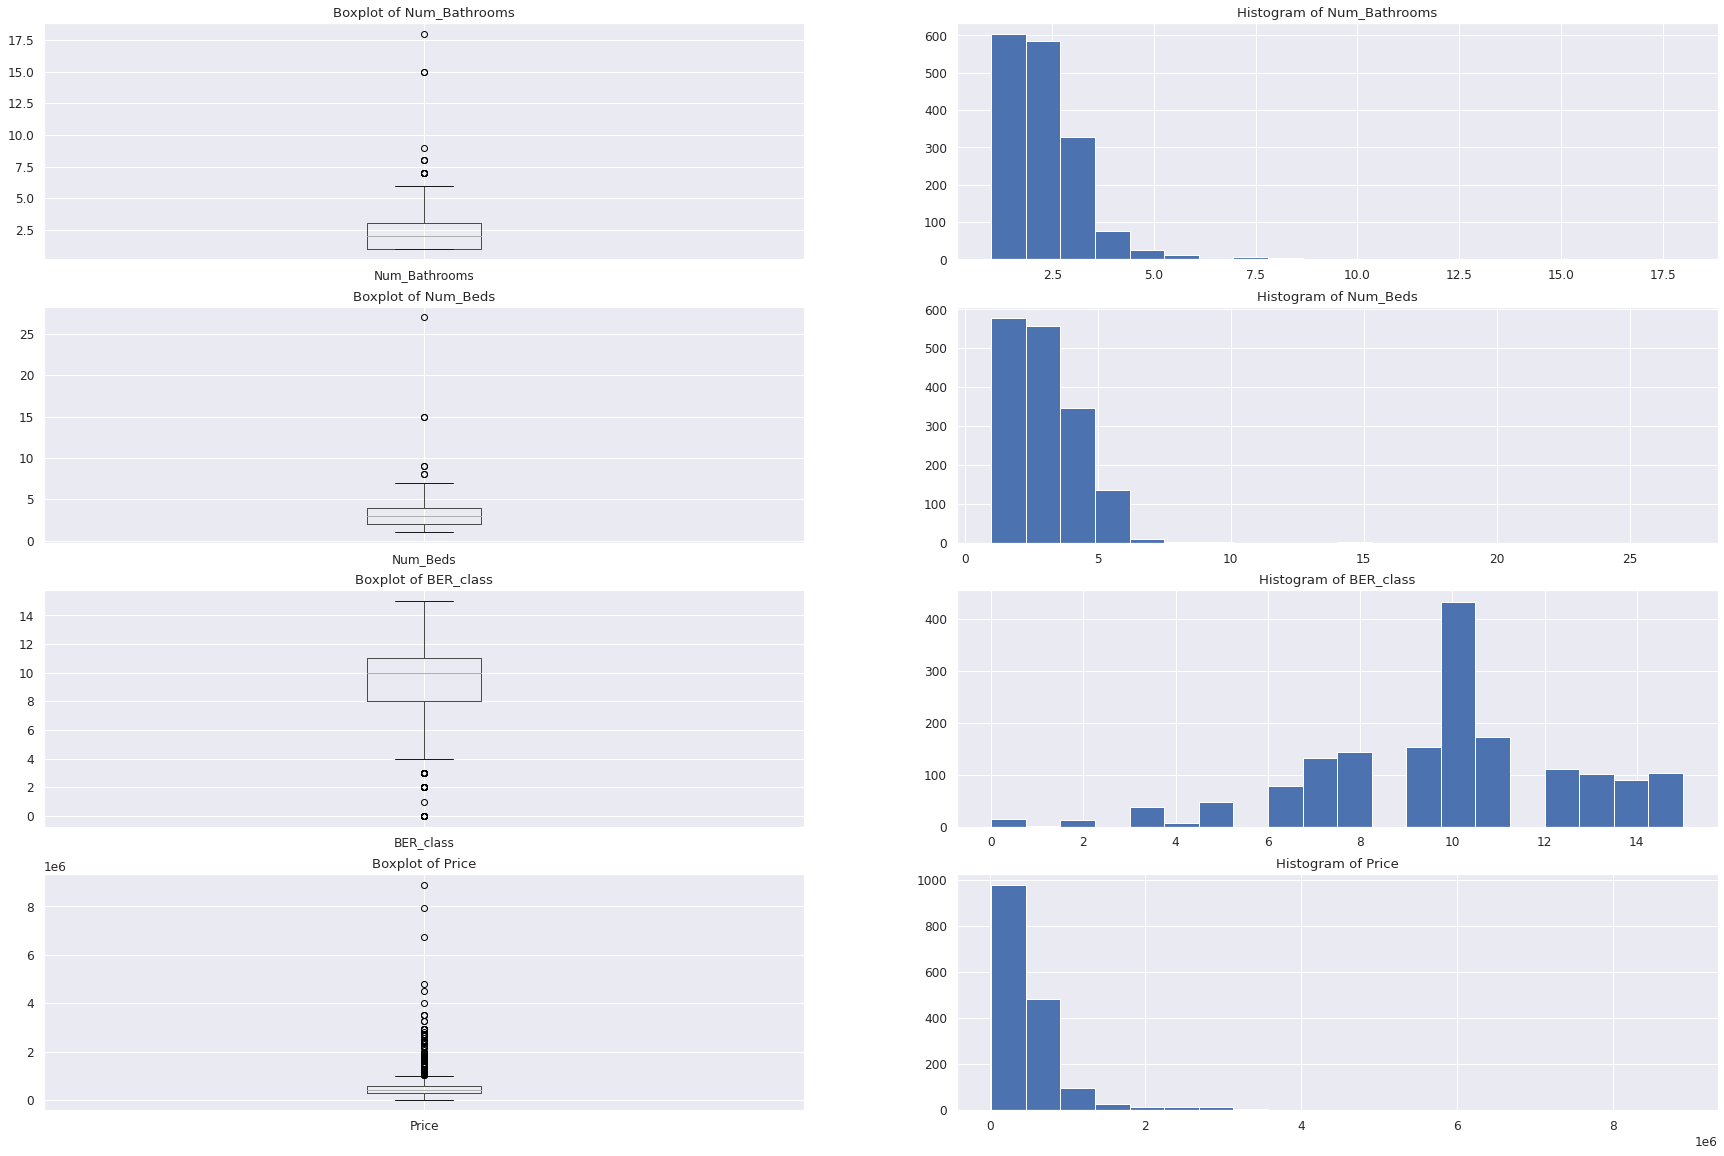

(1638, 151)
After outliers have been removed


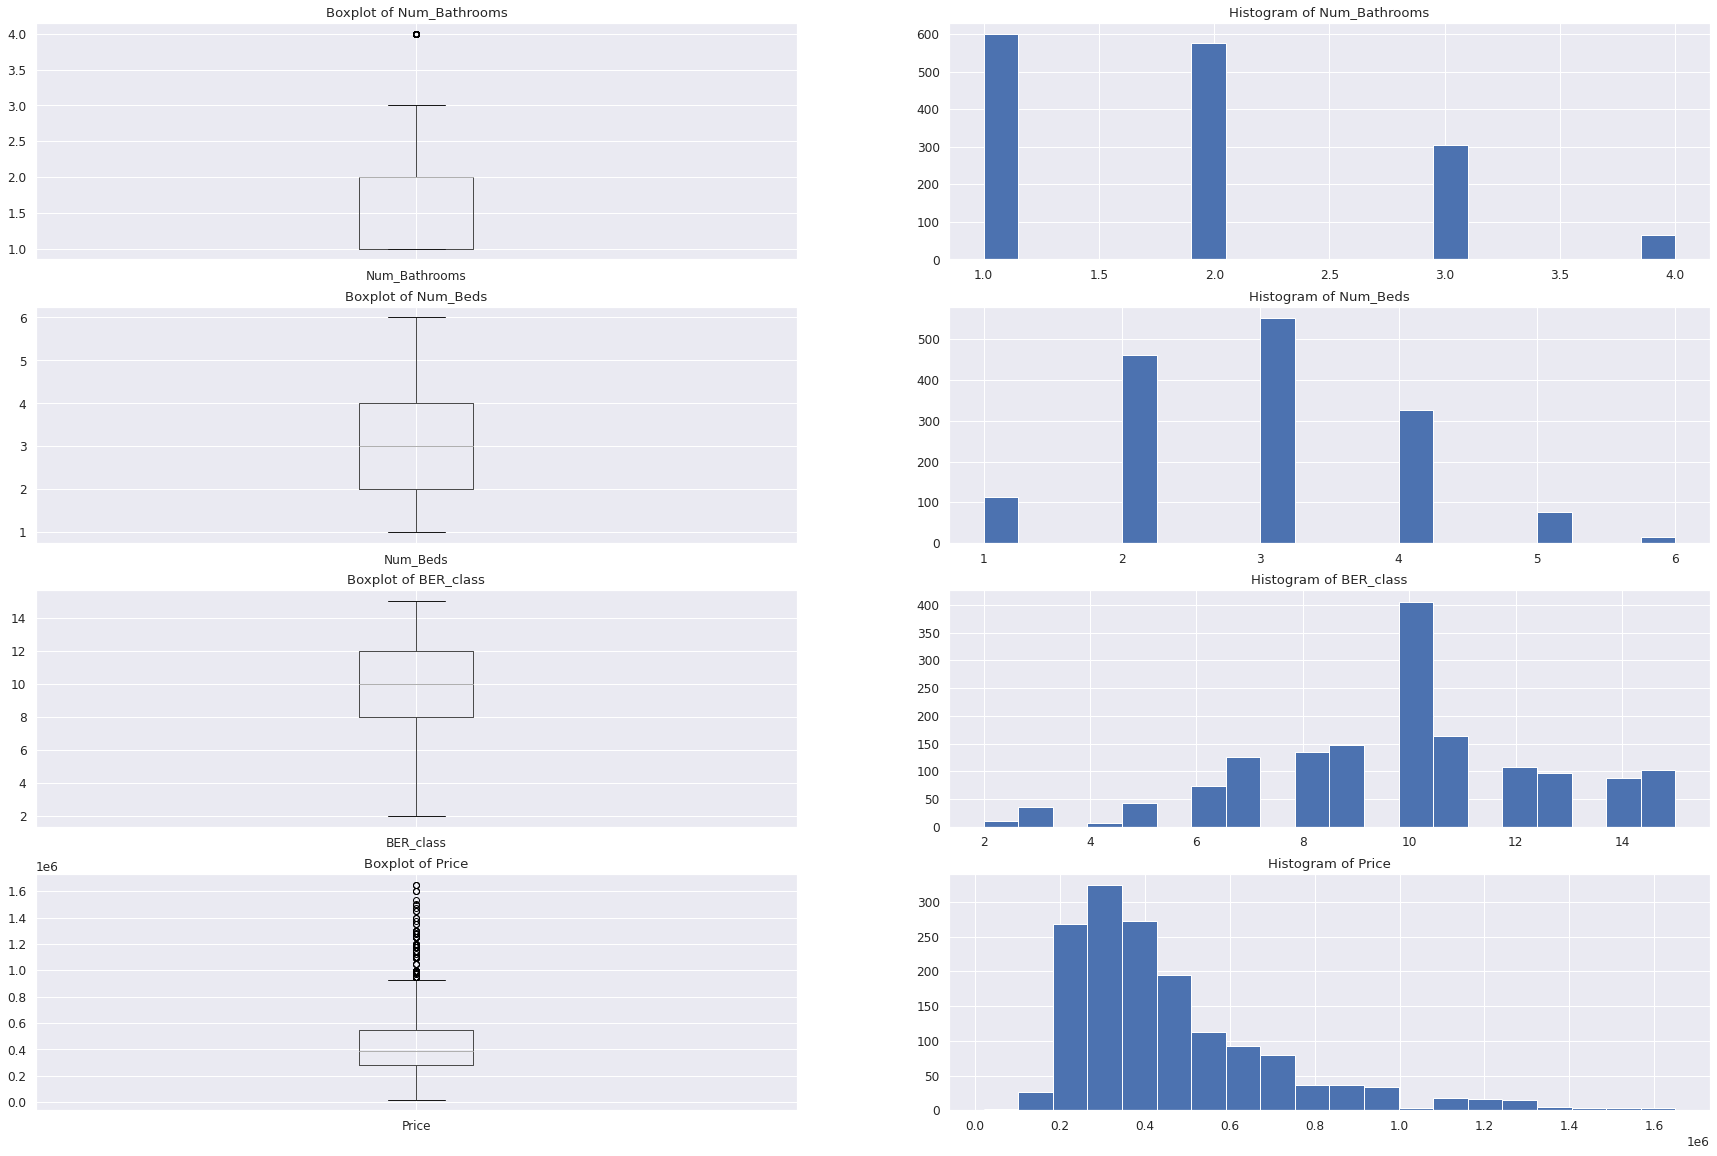

(1542, 151)


In [868]:
#Select features to include in plots
include_featues = ['Num_Bathrooms','Num_Beds','BER_class', 'Price']

#run print function
print("Analysis of outliers")
plot_box_hist(df_train_eda, include_featues)
print(df_train_eda.shape)

print("After outliers have been removed")
for i in range(0, len(include_featues)): 
    df_train_eda = remove_outliers(df_train_eda,include_featues[i])
    if (include_featues[i] != 'Price'):
      df_train_eda = remove_outliers(df_train_eda,include_featues[i])

#run print function
plot_box_hist(df_train_eda, include_featues)
print(df_train_eda.shape)

## Longitude / Latitide Outliers

In [869]:
print("Before...", df_train_eda.shape)

index_train = df_train_eda[(df_train_eda['Longitude'] > -6.0)|(df_train_eda['Latitude'] < 53.0)].index

df_train_eda.drop(index_train, inplace=True)

print("After...", df_train_eda.shape)

Before... (1542, 151)
After... (1541, 151)


## Reset Index for Dataframe

In [870]:
df_train_eda = df_train_eda.reset_index(drop=True)
print(df_train_eda)

      Num_Bathrooms  Num_Beds  ...  Location_Windy Arbour Location_nan
0                 2         2  ...                      0            0
1                 1         2  ...                      0            0
2                 3         3  ...                      0            0
3                 1         3  ...                      0            0
4                 3         4  ...                      0            0
...             ...       ...  ...                    ...          ...
1536              1         1  ...                      0            0
1537              1         2  ...                      0            0
1538              3         5  ...                      0            0
1539              2         3  ...                      0            0
1540              2         2  ...                      0            0

[1541 rows x 151 columns]


# Natural Language Processing

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

In [871]:
# Strip out the NLP Features
df_train_nlp = df_train_eda[nlp_features]

# Feature to us for NLP
nlp_featue = 'Features'

X_train_nlp = df_train_nlp

In [872]:
X_train_nlp

,Features,Description
0,None,DNG are delighted to present to the market no....
1,Bight and Spacious interior\nNumerous original...,13 Northbrook Terrace is a charming red brick ...
2,Special Features\nLarge rear garden\nGenerous ...,"Welcome to No. 6 Cotter Close, an immaculately..."
3,Wonderful 3 bed detached bungalow. \nAccom...,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...
4,Detached Property \nDouble Glazed Windows...,'Four Seasons' comes to the market as a wonder...
...,...,...
1536,None,PROPERTY PARTNERS OBRIEN SWAINE are proud to o...
1537,Extremely convenient location \nWheelchair acc...,Built in c.1930 38 Stradbrook Road is a deligh...
1538,Gas fired central heating with underfloor heat...,An impressive three-story family home superbly...
1539,None,DNG Lucan's leading estate agents are delighte...


In [873]:
X_train_nlp.describe() 

,Features,Description
count,1541,1541
unique,1052,1541
top,None,** Please note. This property can only be sold...
freq,485,1


In [874]:
# Removing stopwords and stemming
# a stem must be a word
# Example:  fishing, fished, and fisher: stem -> fish
# choose English as the target language
stemmer = SnowballStemmer('english', ignore_stopwords=False)

In [875]:
# Stop words are basically a set of commonly used words in any language
# https://en.wikipedia.org/wiki/Stop_word
# and are filtered out before processing of natural language data 
# Example list: https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [876]:
def apply_nlp(dframe):
    '''Apply NLP Processing to a DataFrame'''

    for feature in dframe:
      # removing spaces
      dframe[feature] = dframe[feature].str.replace("[^a-zA-Z#]", " ")
      
      # transforming to lowercase
      dframe[feature] = dframe[feature].apply(lambda x: x.lower())

      # Removing single letters
      dframe[feature] = dframe[feature].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
      
      # removing short words
      short_word = 4
      dframe[feature] = dframe[feature].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

      # Tokenisation
      tokenised_doc = dframe[feature].apply(lambda x: x.split())

      # remove stop-words
      tokenised_doc = tokenised_doc.apply(lambda x: [item for item in x if item not in stop_words])

      # de-tokenization
      detokenized_doc = []
      for i,token in enumerate(tokenised_doc):
        #print(i,token)
        t = ' '.join(token)
        detokenized_doc.append(t)

      # Replace feature with the de-tokenised text
      #print("Idx {} Len of detok {}".format(i, len(detokenized_doc)))
      dframe[feature] = detokenized_doc

    return dframe

In [877]:
X_train_nlp = apply_nlp(X_train_nlp)
#X_test_nlp = apply_nlp(X_test_nlp)

In [878]:
X_train_nlp

,Features,Description
0,,delighted present market chipping bedroom apar...
1,bight spacious interior numerous original feat...,northbrook terrace charming brick period seclu...
2,special features large garden generous street ...,welcome cotter close immaculately presented th...
3,wonderful detached bungalow accommodation exte...,welcome sycamore enjoying premier address smal...
4,detached property double glazed windows double...,seasons comes market wonderful opportunity see...
...,...,...
1536,,property partners obrien swaine proud offer st...
1537,extremely convenient location wheelchair acces...,built stradbrook delightful bedroom double fro...
1538,fired central heating underfloor heating groun...,impressive three story family superbly located...
1539,,lucan leading estate agents delighted present ...


In [879]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 20, max_df=0.5, smooth_idf=True, ngram_range=(2,5))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=20,
                min_df=1, ngram_range=(2, 5), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


In [880]:
X_desc_train = vectorizer.fit_transform(X_train_nlp[nlp_featue])
print(X_desc_train.shape)

#X_desc_test = vectorizer.fit_transform(X_test_nlp[nlp_featue])
#print(X_desc_test.shape)

(1541, 20)


In [881]:
# array mapping from feature integer indices to feature name
int2feature = vectorizer.get_feature_names()
int2feature = [str(x).replace(" ","_") for x in int2feature]
print(int2feature)

['central_heating', 'central_heating_double', 'double_glazed', 'double_glazed_windows', 'excellent_location', 'facing_garden', 'fired_central', 'fired_central_heating', 'floor_apartment', 'glazed_windows', 'heating_double', 'heating_double_glazed', 'heating_double_glazed_windows', 'location_close', 'parking_space', 'south_facing', 'south_facing_garden', 'street_parking', 'transport_links', 'walking_distance']


In [882]:
# new dataset
new_dataset_train = pd.DataFrame(data=np.hstack([X_desc_train.toarray()]), columns=int2feature)

new_dataset_train = new_dataset_train.astype(bool).astype(int)

print(new_dataset_train)

#new_dataset_test = pd.DataFrame(data=np.hstack([X_desc_test.toarray()]), columns=int2feature)
#print(new_dataset_test)

      central_heating  ...  walking_distance
0                   0  ...                 0
1                   1  ...                 1
2                   0  ...                 0
3                   0  ...                 1
4                   0  ...                 0
...               ...  ...               ...
1536                0  ...                 0
1537                1  ...                 1
1538                1  ...                 0
1539                0  ...                 0
1540                0  ...                 0

[1541 rows x 20 columns]


In [883]:
df_train_full = pd.concat([df_train_eda, new_dataset_train], axis=1)
print(df_train_full)

      Num_Bathrooms  Num_Beds  ...  transport_links walking_distance
0                 2         2  ...                0                0
1                 1         2  ...                0                1
2                 3         3  ...                0                0
3                 1         3  ...                0                1
4                 3         4  ...                0                0
...             ...       ...  ...              ...              ...
1536              1         1  ...                0                0
1537              1         2  ...                0                1
1538              3         5  ...                1                0
1539              2         3  ...                0                0
1540              2         2  ...                0                0

[1541 rows x 171 columns]


# Training & Test Data Split



In [884]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

#featrain = ['Num_Bathrooms','Num_Beds','BER_class', 'Longitude', 'Latitude', 'Price', 'Features', 'Description']
#featrain = featrain + int2feature
featrain = []
# dropna: remove missing values

# print(df_train_full.shape)

if len(featrain) > 0:
  df_subset_train = df_train_full[featrain].drop(nlp_features, axis=1)
else:
  df_subset_train = df_train_full.drop(nlp_features, axis=1)

df_subset_train = df_subset_train.dropna(axis=0)

df_cost = df_subset_train['Price']

df_subset_train = df_subset_train.drop(['Price'], axis=1)

#df_subset_train = pd.concat([df_subset_train,df_train_nlp])

print(df_subset_train.shape)
print(df_cost.shape)

(1541, 168)
(1541,)


In [885]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_test,y_train,y_test = train_test_split(df_subset_train, df_cost, test_size=0.3)

### Train dataset

In [886]:
# show first data frame rows 
X_train

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Location_Ard Na Greine,Location_Artane,Location_Ashtown,Location_Balbriggan,Location_Baldoyle,Location_Balgriffin,Location_Ballinteer,Location_Ballsbridge,Location_Ballybough,Location_Ballyboughal,Location_Ballybrack,Location_Ballycullen,Location_Ballyfermot,Location_Ballymun,Location_Balrothery,Location_Beaumont,Location_Blackrock,Location_Blanchardstown,Location_Bluebell,Location_Booterstown,Location_Brittas,Location_Cabinteely,Location_Cabra,Location_Carrickmines,Location_Castleknock,Location_Chapelizod,Location_Christchurch,Location_Churchtown,Location_Citywest,Location_Clarehall,Location_Clondalkin,Location_Clonee,Location_Clongriffin,Location_Clonshaugh,...,Location_Santry,Location_Shankill,Location_Skerries,Location_Smithfield,Location_South Circular Road,Location_Stepaside,Location_Stoneybatter,Location_Sutton,Location_Swords,Location_Tallaght,Location_Temple Bar,Location_Templeogue,Location_Terenure,Location_The Coombe,Location_The Ward,Location_Tyrrelstown,Location_Walkinstown,Location_Whitehall,Location_Windy Arbour,Location_nan,central_heating,central_heating_double,double_glazed,double_glazed_windows,excellent_location,facing_garden,fired_central,fired_central_heating,floor_apartment,glazed_windows,heating_double,heating_double_glazed,heating_double_glazed_windows,location_close,parking_space,south_facing,south_facing_garden,street_parking,transport_links,walking_distance
345,1,2,8.0,53.282824,-6.423571,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
301,1,3,15.0,53.304276,-6.276936,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0
902,2,3,12.0,53.575933,-6.104480,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1206,2,5,10.0,53.383201,-6.166650,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
460,2,2,11.0,53.288022,-6.171388,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1,2,8.0,53.363981,-6.208024,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1017,2,2,10.0,53.451130,-6.156826,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144,2,3,10.0,53.610793,-6.198461,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0
1455,3,4,10.0,53.320972,-6.260806,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Test dataset

In [887]:
# show first data frame rows 
X_test

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Location_Ard Na Greine,Location_Artane,Location_Ashtown,Location_Balbriggan,Location_Baldoyle,Location_Balgriffin,Location_Ballinteer,Location_Ballsbridge,Location_Ballybough,Location_Ballyboughal,Location_Ballybrack,Location_Ballycullen,Location_Ballyfermot,Location_Ballymun,Location_Balrothery,Location_Beaumont,Location_Blackrock,Location_Blanchardstown,Location_Bluebell,Location_Booterstown,Location_Brittas,Location_Cabinteely,Location_Cabra,Location_Carrickmines,Location_Castleknock,Location_Chapelizod,Location_Christchurch,Location_Churchtown,Location_Citywest,Location_Clarehall,Location_Clondalkin,Location_Clonee,Location_Clongriffin,Location_Clonshaugh,...,Location_Santry,Location_Shankill,Location_Skerries,Location_Smithfield,Location_South Circular Road,Location_Stepaside,Location_Stoneybatter,Location_Sutton,Location_Swords,Location_Tallaght,Location_Temple Bar,Location_Templeogue,Location_Terenure,Location_The Coombe,Location_The Ward,Location_Tyrrelstown,Location_Walkinstown,Location_Whitehall,Location_Windy Arbour,Location_nan,central_heating,central_heating_double,double_glazed,double_glazed_windows,excellent_location,facing_garden,fired_central,fired_central_heating,floor_apartment,glazed_windows,heating_double,heating_double_glazed,heating_double_glazed_windows,location_close,parking_space,south_facing,south_facing_garden,street_parking,transport_links,walking_distance
525,2,3,7.0,53.380545,-6.205246,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
509,3,2,10.0,53.404625,-6.287527,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
757,2,2,7.0,53.610949,-6.199263,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1493,1,2,10.0,53.360874,-6.257766,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,1,1,12.0,53.342098,-6.314104,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1,3,15.0,53.268723,-6.259267,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
612,2,3,12.0,53.378587,-6.182908,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0
736,1,3,9.0,53.398805,-6.152317,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1487,2,4,8.0,53.270914,-6.252692,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Expected Cost dataset

In [888]:
# show first data frame rows 
y_train

345      220000
301      500000
902      350000
1206     625000
460      425000
         ...   
1018     420000
1017     445000
144      230000
1455    1535000
710      370000
Name: Price, Length: 1078, dtype: int64

In [889]:
# train set, input columns
Xs_train = X_train.iloc[:,0:].values 

# train set, output column, cost
ys_train = y_train.values.reshape(-1, 1)

# test set, input columns
Xs_test = X_test.iloc[:,0:].values 

# test set, output column, cost
#y_test = y_test.values.reshape(-1, 1)

print(Xs_train.shape)
print(ys_train.shape)
print(Xs_test.shape)
print(y_test.shape)

(1078, 168)
(1078, 1)
(463, 168)
(463,)


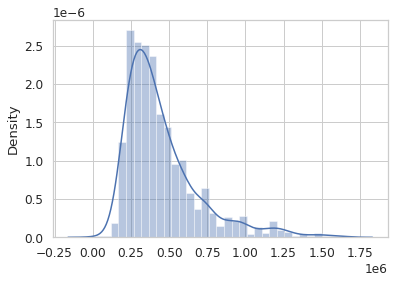

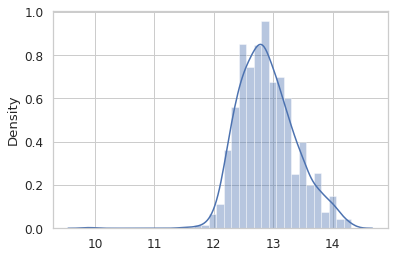

In [890]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1#

sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

#Quick Analysis of House Price Data
x = ys_train
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

x_log = np.log(x)
sns.distplot(x_log)
plt.show()

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

In [891]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

Finished [100%]: Average Loss = 1,883.8


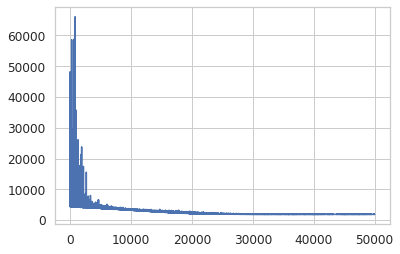

In [892]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter, method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [893]:
# samples from the posterior
posterior = approximation.sample(5000)

In [894]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))
print("RMSLE = ",(mean_squared_log_error(y_test,y_pred_BLR)))


MAE =  88638.71686211848
MAPE =  0.1646777774989651
RMSLE =  0.05040437177268488


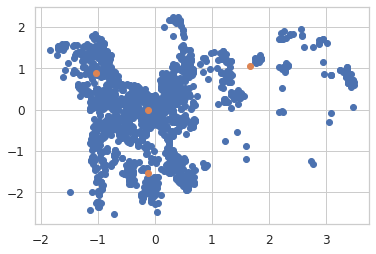

In [895]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
# clustering by features 1, 2
ind=[3,4]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

In [896]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 200, 1: 173, 2: 550, 3: 155}

In [897]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 80, 1: 97, 2: 225, 3: 61}

In [898]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]
ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [899]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [900]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [901]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [902]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)


Finished [100%]: Average Loss = 930.93


In [903]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 886.34


In [904]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 1,547.2


In [905]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 826.56


In [906]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

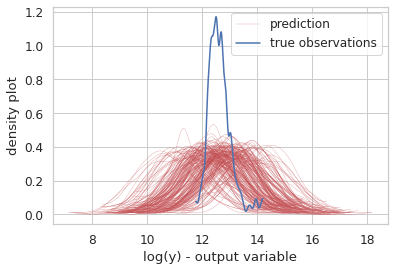

In [907]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

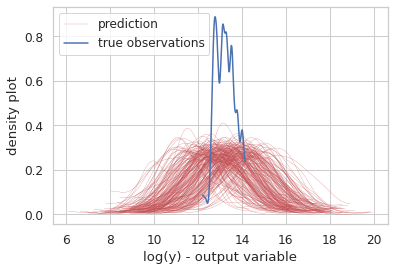

In [908]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

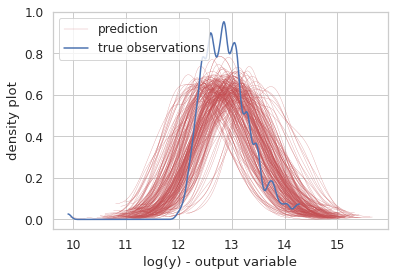

In [909]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

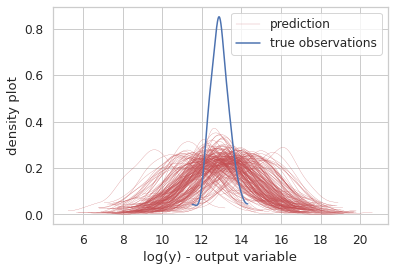

In [910]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [911]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3])])

# joint MAPE
joint_MAPE=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]) / y_test[clusters_test==0],
                     abs(y_pred_BLR1 - y_test[clusters_test==1]) / y_test[clusters_test==1],
                     abs(y_pred_BLR2 - y_test[clusters_test==2]) / y_test[clusters_test==2],
                     abs(y_pred_BLR3 - y_test[clusters_test==3]) / y_test[clusters_test==3]
                    ])

# joint RMSLE
joint_rmsle=np.hstack([mean_squared_log_error(y_test[clusters_test==0],y_pred_BLR0),
                 mean_squared_log_error(y_test[clusters_test==1],y_pred_BLR1),
                 mean_squared_log_error(y_test[clusters_test==2],y_pred_BLR2),
                 mean_squared_log_error(y_test[clusters_test==3],y_pred_BLR3)])

# MAE
print("MAE=",np.mean(joint))

# MAPE
print("MAPE=",np.mean(joint_MAPE))

# RMSLE
print("RMSLE=",np.mean(joint_rmsle))

Size Cluster0 80 , MAE Cluster0= 60865.14446683061
Size Cluster1 97 , MAE Cluster1= 145028.93749678828
Size Cluster2 225 , MAE Cluster2= 80864.60038400762
Size Cluster3 61 , MAE Cluster3= 80659.5220081689
MAE= 90824.58838754844
MAPE= 0.1737279012409549
RMSLE= 0.055345819052494596


# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [912]:
# your code here

# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [913]:
# some parameters
par1 = 30  # start with 100, then use 1000+
par2 = 300 # start with 1000, then use 10000+

# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)

Only 25 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w_0, w_1]


Sampling 1 chain for 259 tune and 25 draw iterations (259 + 25 draws total) took 173 seconds.


In [914]:
# we can do instead an approximated inference
param3 = 40000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.0008    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 1,227.6


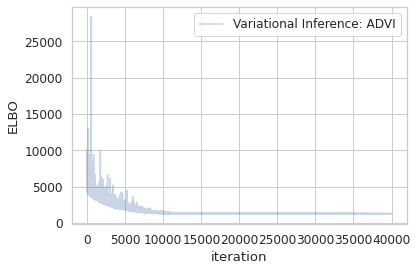

In [915]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [916]:
# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

In [917]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])
y_final_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_final_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_final_pred = np.array(y_final_pred).mean(axis=0)

In [918]:
#We need to do the inverse transformation and scaling that was carried out on the y values at the start
y_val_pred_final = np.exp(yscaler.inverse_transform(y_final_pred))

print("MAE = ",(np.mean(abs(y_val_pred_final - y_test))))
print("MAPE = ",(np.mean(abs(y_val_pred_final - y_test) / y_test)))
print("RMSLE = ",(mean_squared_log_error(y_test,y_val_pred_final)))

MAE =  100898.89423485423
MAPE =  0.18778508195156662
RMSLE =  0.07097259868754642


In [1037]:
# add a column of ones to include an intercept in the model
x3 = np.hstack([np.ones((df_test_full.shape[0],1)), df_test_full])
y_kaggle_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x3.T))
    #outer layer
    y_kaggle_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_kaggle_pred = np.array(y_kaggle_pred).mean(axis=0)

ValueError: ignored

In [919]:
g6_kaggle_price = pd.DataFrame(y_val_pred_final, columns=['Price'])
test_predictions = pd.concat([df_test['Index'], g6_kaggle_price.astype(int)], axis=1)
test_predictions.to_csv(Path + 'ET5003_BayesianNN_Kaggle_Team6.csv', index=False)

# REFERENCES

Thatdatatho.com. 2021. Predicting Housing Prices with Natural Language Processing NLP and Tidymodels. [online] Available at: <https://thatdatatho.com/predicting-housing-prices-nlp/> [Accessed 8 October 2021]

Medium. 2021. House Prices Prediction Using Deep Learning. [online] Available at: <https://towardsdatascience.com/house-prices-prediction-using-deep-learning-dea265cc3154> [Accessed 8 October 2021]

Arno.uvt.nl. Predicting Real Estate Price Using Text Mining 2021. [online] Available at: <http://arno.uvt.nl/show.cgi?fid=134740> [Accessed 11 October 2021].




# SUMMARY

Your summary here.